## 先使用基础的SARSA

SARSA测试成功率: 100/100 = 100.00%


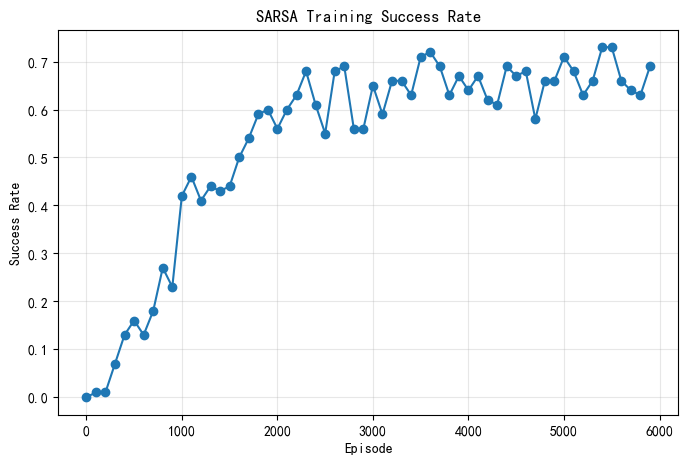

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
# 创建taxi-v3环境
env = gym.make('Taxi-v3', render_mode=None)

Q = np.zeros([env.observation_space.n, env.action_space.n])

alpha = 0.1    # 学习率
gamma = 0.99   # 折扣因子
epsilon = 0.1  # 固定探索率
episodes = 6000


episode_rewards = []

# SARSA
for episode in range(episodes):
    state = env.reset()[0]
    
    if np.random.random() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    
    total_reward = 0
    done = False
    
    while not done:
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        if np.random.random() < epsilon:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q[next_state])
        
        # SARSA更新
        if done:
            Q[state, action] = Q[state, action] + alpha * (reward - Q[state, action])
        else:
            Q[state, action] = Q[state, action] + alpha * (
                reward + gamma * Q[next_state, next_action] - Q[state, action]
            )
        
        # 更新状态和动作
        state = next_state
        action = next_action
        total_reward += reward
    
    episode_rewards.append(total_reward)

# 测试
test_episodes = 100
test_successes = 0

for _ in range(test_episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0
    
    while not done:
        action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        state = next_state
        total_reward += reward
    
    if total_reward > 0:
        test_successes += 1

print(f"SARSA测试成功率: {test_successes}/{test_episodes} = {test_successes/test_episodes:.2%}")

# 绘制成功率曲线
window_size = 100
success_rates = []

for i in range(0, len(episode_rewards), window_size):
    batch = episode_rewards[i:i+window_size]
    success_rate = sum(1 for r in batch if r > 0) / len(batch)
    success_rates.append(success_rate)

plt.figure(figsize=(8, 5))
plt.plot(range(0, len(episode_rewards), window_size), success_rates, marker='o')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.title('SARSA Training Success Rate')
plt.grid(True, alpha=0.3)
plt.show()

## 基础Q-learning

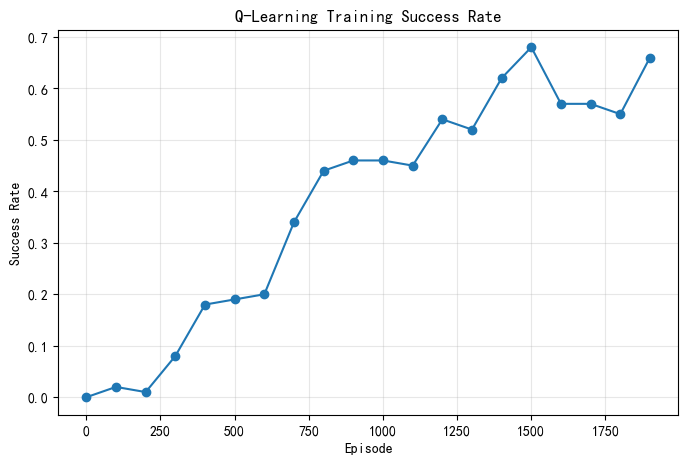

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# 创建环境
env = gym.make('Taxi-v3', render_mode=None)


Q = np.zeros([env.observation_space.n, env.action_space.n])


alpha = 0.1    # 学习率
gamma = 0.99   # 折扣因子
epsilon = 0.1  # 固定探索率
episodes = 2000

episode_rewards = []

# Q-Learning训练
for episode in range(episodes):
    state = env.reset()[0]
    total_reward = 0
    done = False
    
    while not done:
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        # Q-Learning更新
        if done:
            Q[state, action] = Q[state, action] + alpha * (reward - Q[state, action])
        else:
            Q[state, action] = Q[state, action] + alpha * (
                reward + gamma * np.max(Q[next_state]) - Q[state, action]
            )
        
        # 更新状态
        state = next_state
        total_reward += reward
    
    episode_rewards.append(total_reward)

# 测试
test_episodes = 100
test_successes = 0

for _ in range(test_episodes):
    state = env.reset()[0]
    done = False
    total_reward = 0
    
    while not done:
        action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        state = next_state
        total_reward += reward
    
    if total_reward > 0:
        test_successes += 1


# 绘制成功率曲线
window_size = 100
success_rates = []

for i in range(0, len(episode_rewards), window_size):
    batch = episode_rewards[i:i+window_size]
    success_rate = sum(1 for r in batch if r > 0) / len(batch)
    success_rates.append(success_rate)

plt.figure(figsize=(8, 5))
plt.plot(range(0, len(episode_rewards), window_size), success_rates, marker='o')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.title('Q-Learning Training Success Rate')
plt.grid(True, alpha=0.3)
plt.show()

在实现SARSA和Q-Learning的过程中，我发现仅仅按照基础算法公式进行Q值更新是不够的，最终的成功率在0.6左右波动，显然还需要加入一些关键的技巧来确保算法能够有效学习，我选用epsilon = epsilon * 0.995的探索率衰减策略
修正后的代码如下



E:\Anaconda_envs\envs\LLM\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


状态数量: 500
动作数量: 6
Q表形状: (500, 6)
Episode 100:
  平均奖励: -631.85
  成功率: 0.00%
  当前探索率: 0.606
Episode 200:
  平均奖励: -406.29
  成功率: 0.00%
  当前探索率: 0.367
Episode 300:
  平均奖励: -273.67
  成功率: 0.00%
  当前探索率: 0.222
Episode 400:
  平均奖励: -155.84
  成功率: 3.00%
  当前探索率: 0.135
Episode 500:
  平均奖励: -87.12
  成功率: 13.00%
  当前探索率: 0.082
Episode 600:
  平均奖励: -61.39
  成功率: 19.00%
  当前探索率: 0.049
Episode 700:
  平均奖励: -45.63
  成功率: 20.00%
  当前探索率: 0.030
Episode 800:
  平均奖励: -26.16
  成功率: 32.00%
  当前探索率: 0.018
Episode 900:
  平均奖励: -17.98
  成功率: 37.00%
  当前探索率: 0.011
Episode 1000:
  平均奖励: -6.59
  成功率: 53.00%
  当前探索率: 0.010
Episode 1100:
  平均奖励: -4.15
  成功率: 48.00%
  当前探索率: 0.010
Episode 1200:
  平均奖励: 0.60
  成功率: 66.00%
  当前探索率: 0.010
Episode 1300:
  平均奖励: 2.72
  成功率: 72.00%
  当前探索率: 0.010
Episode 1400:
  平均奖励: 3.12
  成功率: 76.00%
  当前探索率: 0.010
Episode 1500:
  平均奖励: 3.89
  成功率: 77.00%
  当前探索率: 0.010
Episode 1600:
  平均奖励: 5.91
  成功率: 85.00%
  当前探索率: 0.010
Episode 1700:
  平均奖励: 6.51
  成功率: 91.00%
  当前探索率: 0.010
Epis

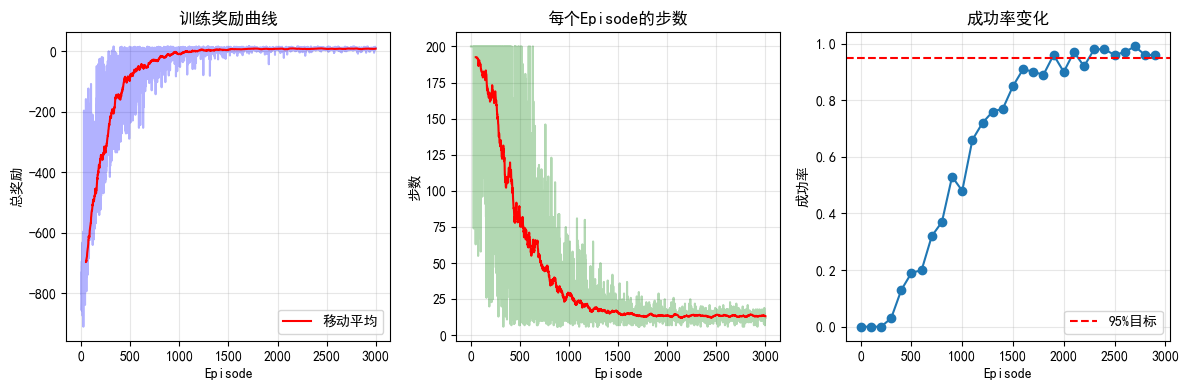


第8步：分析Q表
Q表中非零值: 2400/3000 (80.0%)
Q值最大: 20.00
Q值最小: -14.85
Q值平均: -6.01

第9步：演示一次接送过程
开始演示（会打开新窗口）
步骤1: 执行动作 - 东
步骤2: 执行动作 - 东
步骤3: 执行动作 - 东
步骤4: 执行动作 - 南
步骤5: 执行动作 - 南
步骤6: 执行动作 - 接客
步骤7: 执行动作 - 东
步骤8: 执行动作 - 北
步骤9: 执行动作 - 北
步骤10: 执行动作 - 北
步骤11: 执行动作 - 北
步骤12: 执行动作 - 送客
✓ 成功！总奖励: 9, 步数: 12

第10步：保存训练结果
Q表已保存为 'sarsa_q_table.npy'

训练完成
SARSA训练总结
1. 训练了 3000 个episodes
2. 最终测试成功率: 93.00%
3. 探索率从 1.0 降到 0.010
4. Q表已更新 2400 个值


In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pygame
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

env = gym.make('Taxi-v3', render_mode=None)  # 先不渲染

# 看看环境的基本信息
print(f"状态数量: {env.observation_space.n}")  # 500个状态
print(f"动作数量: {env.action_space.n}")      # 6个动作


Q = np.zeros([env.observation_space.n, env.action_space.n])
print(f"Q表形状: {Q.shape}")

alpha = 0.1    
gamma = 0.99   
epsilon = 1.0   
episodes = 3000 


# 记录训练过程
all_rewards = []    
all_steps = []     
success_count = 0  


for episode in range(episodes):
    # 重置环境
    state = env.reset()[0]  # reset()返回(state, info)，只要state
    
    # SARSA特点：先选择初始动作
    if np.random.random() < epsilon:
        action = env.action_space.sample()
    else:
        # 利用：选择Q值最大的动作
        action = np.argmax(Q[state])
    

    total_reward = 0
    steps = 0
    done = False
    

    while not done and steps < 200:  # 最多200步，防止死循环
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        

        if np.random.random() < epsilon:
            next_action = env.action_space.sample()  # 探索
        else:
            next_action = np.argmax(Q[next_state])   # 利用
            
        if done:
            Q[state, action] = Q[state, action] + alpha * (reward - Q[state, action])
        else:
            Q[state, action] = Q[state, action] + alpha * (
                reward + gamma * Q[next_state, next_action] - Q[state, action]
            )
        
        # 更新状态和动作
        state = next_state
        action = next_action  
        
        # 累计奖励和步数
        total_reward += reward
        steps += 1
    
    # 记录这个episode的结果
    all_rewards.append(total_reward)
    all_steps.append(steps)
    
    # 如果成功送达（奖励>0），计数
    if total_reward > 0:
        success_count += 1
    
    # 逐渐减少探索（探索率衰减）
    epsilon = epsilon * 0.995  # 每次乘以0.995，慢慢减少
    if epsilon < 0.01:
        epsilon = 0.01  # 最低保持1%的探索
    
    # 每100个episode打印一次进度
    if (episode + 1) % 100 == 0:
        # 计算最近100个episode的平均表现
        recent_rewards = all_rewards[-100:]
        avg_reward = np.mean(recent_rewards)
        success_rate = sum(1 for r in recent_rewards if r > 0) / len(recent_rewards)
        
        print(f"Episode {episode + 1}:")
        print(f"  平均奖励: {avg_reward:.2f}")
        print(f"  成功率: {success_rate:.2%}")
        print(f"  当前探索率: {epsilon:.3f}")

# 训练完成，测试策略 

print("测试训练好的策略")

# 测试100次，看看成功率
test_rewards = []
test_steps = []

for test in range(100):
    state = env.reset()[0]
    total_reward = 0
    steps = 0
    done = False
    
    while not done and steps < 200:
        # 测试时不探索，总是选最好的动作
        action = np.argmax(Q[state])
        
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        total_reward += reward
        state = next_state
        steps += 1
    
    test_rewards.append(total_reward)
    test_steps.append(steps)

# 计算测试结果
test_success_rate = sum(1 for r in test_rewards if r > 0) / len(test_rewards)
print(f"测试成功率: {test_success_rate:.2%}")
print(f"平均奖励: {np.mean(test_rewards):.2f}")
print(f"平均步数: {np.mean(test_steps):.2f}")

# 可视化训练过程
print("\n绘制训练曲线")

plt.figure(figsize=(12, 4))

# 图1：奖励曲线
plt.subplot(1, 3, 1)
plt.plot(all_rewards, alpha=0.3, color='blue')
# 计算移动平均（每50个episode）
window = 50
moving_avg = np.convolve(all_rewards, np.ones(window)/window, mode='valid')
plt.plot(range(window-1, len(all_rewards)), moving_avg, color='red', label='移动平均')
plt.xlabel('Episode')
plt.ylabel('总奖励')
plt.title('训练奖励曲线')
plt.legend()
plt.grid(True, alpha=0.3)

# 图2：步数曲线
plt.subplot(1, 3, 2)
plt.plot(all_steps, alpha=0.3, color='green')
steps_moving_avg = np.convolve(all_steps, np.ones(window)/window, mode='valid')
plt.plot(range(window-1, len(all_steps)), steps_moving_avg, color='red')
plt.xlabel('Episode')
plt.ylabel('步数')
plt.title('每个Episode的步数')
plt.grid(True, alpha=0.3)

# 图3：成功率曲线（每100个episode计算一次）
plt.subplot(1, 3, 3)
success_rates = []
for i in range(0, len(all_rewards), 100):
    batch = all_rewards[i:i+100]
    rate = sum(1 for r in batch if r > 0) / len(batch)
    success_rates.append(rate)
plt.plot(range(0, len(all_rewards), 100), success_rates, marker='o')
plt.xlabel('Episode')
plt.ylabel('成功率')
plt.title('成功率变化')
plt.axhline(y=0.95, color='r', linestyle='--', label='95%目标')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#  第8步：看看智能体学到了什么 
print("\n第8步：分析Q表")

# 统计Q表中非零的值
non_zero_count = np.sum(Q != 0)
total_values = Q.size
print(f"Q表中非零值: {non_zero_count}/{total_values} ({non_zero_count/total_values*100:.1f}%)")

# 看看Q值的范围
print(f"Q值最大: {np.max(Q):.2f}")
print(f"Q值最小: {np.min(Q):.2f}")
print(f"Q值平均: {np.mean(Q[Q != 0]):.2f}")  # 只计算非零值的平均

#  第9步：演示一次完整的接送过程 
print("\n第9步：演示一次接送过程")


# 创建可视化环境
env_visual = gym.make('Taxi-v3', render_mode='human')
state = env_visual.reset()[0]

print("开始演示（会打开新窗口）")
total_reward = 0
steps = 0

for step in range(50):  # 最多50步
    # 使用学习好的策略
    action = np.argmax(Q[state])
    
    # 显示当前选择
    action_names = ['南', '北', '东', '西', '接客', '送客']
    print(f"步骤{step + 1}: 执行动作 - {action_names[action]}")
    
    # 执行动作
    next_state, reward, terminated, truncated, info = env_visual.step(action)
    done = terminated or truncated
    
    total_reward += reward
    state = next_state
    
    if done:
        if total_reward > 0:
            print(f"✓ 成功！总奖励: {total_reward}, 步数: {step + 1}")
        else:
            print(f"✗ 失败！总奖励: {total_reward}")
        break

env_visual.close()

# 第10步：保存Q表 
print("\n第10步：保存训练结果")
np.save('sarsa_q_table.npy', Q)
print("Q表已保存为 'sarsa_q_table.npy'")
print("\n训练完成")

# 总结

print("SARSA训练总结")

print(f"1. 训练了 {episodes} 个episodes")
print(f"2. 最终测试成功率: {test_success_rate:.2%}")
print(f"3. 探索率从 1.0 降到 {epsilon:.3f}")
print(f"4. Q表已更新 {non_zero_count} 个值")



开始Q-Learning训练...
Episode 100:
  平均奖励: -634.51
  成功率: 0.00%
  当前探索率: 0.606
Episode 200:
  平均奖励: -408.84
  成功率: 0.00%
  当前探索率: 0.367
Episode 300:
  平均奖励: -250.45
  成功率: 0.00%
  当前探索率: 0.222
Episode 400:
  平均奖励: -160.37
  成功率: 2.00%
  当前探索率: 0.135
Episode 500:
  平均奖励: -85.41
  成功率: 13.00%
  当前探索率: 0.082
Episode 600:
  平均奖励: -51.16
  成功率: 20.00%
  当前探索率: 0.049
Episode 700:
  平均奖励: -32.55
  成功率: 31.00%
  当前探索率: 0.030
Episode 800:
  平均奖励: -17.55
  成功率: 37.00%
  当前探索率: 0.018
Episode 900:
  平均奖励: -9.03
  成功率: 54.00%
  当前探索率: 0.011
Episode 1000:
  平均奖励: -4.34
  成功率: 52.00%
  当前探索率: 0.010
Episode 1100:
  平均奖励: -0.21
  成功率: 66.00%
  当前探索率: 0.010
Episode 1200:
  平均奖励: 3.43
  成功率: 75.00%
  当前探索率: 0.010
Episode 1300:
  平均奖励: 4.37
  成功率: 80.00%
  当前探索率: 0.010
Episode 1400:
  平均奖励: 4.21
  成功率: 82.00%
  当前探索率: 0.010
Episode 1500:
  平均奖励: 5.28
  成功率: 87.00%
  当前探索率: 0.010
Episode 1600:
  平均奖励: 5.36
  成功率: 85.00%
  当前探索率: 0.010
Episode 1700:
  平均奖励: 6.51
  成功率: 89.00%
  当前探索率: 0.010
Episode 1800:
  平均奖励

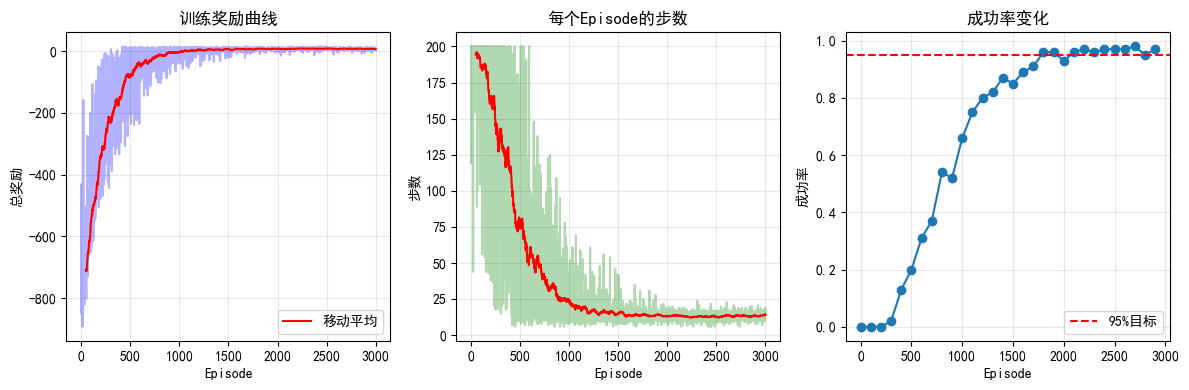


分析Q表
Q表中非零值: 2399/3000 (80.0%)
Q值最大: 20.00
Q值最小: -12.36
Q值平均: -4.20

演示一次接送过程
步骤1: 执行动作 - 南
步骤2: 执行动作 - 接客
步骤3: 执行动作 - 北
步骤4: 执行动作 - 北
步骤5: 执行动作 - 北
步骤6: 执行动作 - 北
步骤7: 执行动作 - 送客
成功！总奖励: 14, 步数: 7


In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

#  前面部分完全一样
env = gym.make('Taxi-v3', render_mode=None)
Q = np.zeros([env.observation_space.n, env.action_space.n])
#Q = np.random.uniform(-0.1, 0.1, [env.observation_space.n, env.action_space.n])
alpha = 0.1
gamma = 0.99
epsilon = 1.0
episodes = 3000

all_rewards = []
all_steps = []

print("开始Q-Learning训练...")


for episode in range(episodes):
    state = env.reset()[0]
    
    # 改动1：Q-Learning不需要先选择初始动作
    # SARSA需要先选一个动作，Q-Learning不需要
    
    total_reward = 0
    steps = 0
    done = False
    
    while not done and steps < 200:
        # 选择动作（这部分一样）
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        
        # 执行动作（这部分一样）
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        # Q-Learning不需要选择next_action
        # SARSA: 需要选择next_action，然后用Q[next_state, next_action]
        # Q-Learning: 直接用max Q[next_state]
        
        # ========== 这是唯一的核心区别 ==========
        
        # SARSA的更新：
        
        # # SARSA需要选择下一个动作
        # if np.random.random() < epsilon:
        #     next_action = env.action_space.sample()
        # else:
        #     next_action = np.argmax(Q[next_state])
        
        # # SARSA使用实际要执行的next_action
        # if done:
        #     Q[state, action] = Q[state, action] + alpha * (reward - Q[state, action])
        # else:
        #     Q[state, action] = Q[state, action] + alpha * (
        #         reward + gamma * Q[next_state, next_action] - Q[state, action]
        #     )
        
        # # SARSA需要更新action
        # action = next_action
        
        
        # Q-Learning的更新：
        if done:
            Q[state, action] = Q[state, action] + alpha * (reward - Q[state, action])
        else:
            # Q-Learning：直接使用max Q值，不管实际会选择什么动作
            Q[state, action] = Q[state, action] + alpha * (
                reward + gamma * np.max(Q[next_state]) - Q[state, action]
            )
        
        # 改动3：Q-Learning不需要更新action变量 因为下一轮循环会重新选择动作
        
        state = next_state
        
        total_reward += reward
        steps += 1
    
    # 后面的代码都一样
    all_rewards.append(total_reward)
    all_steps.append(steps)
    
    epsilon = epsilon * 0.995
    if epsilon < 0.01:
        epsilon = 0.01
    
    if (episode + 1) % 100 == 0:
        recent_rewards = all_rewards[-100:]
        avg_reward = np.mean(recent_rewards)
        success_rate = sum(1 for r in recent_rewards if r > 0) / len(recent_rewards)
        
        print(f"Episode {episode + 1}:")
        print(f"  平均奖励: {avg_reward:.2f}")
        print(f"  成功率: {success_rate:.2%}")
        print(f"  当前探索率: {epsilon:.3f}")


print("\n测试Q-Learning策略...")
test_rewards = []
test_steps = []

for test in range(100):
    state = env.reset()[0]
    total_reward = 0
    steps = 0
    done = False
    
    while not done and steps < 200:
        action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        total_reward += reward
        state = next_state
        steps += 1
    
    test_rewards.append(total_reward)
    test_steps.append(steps)

test_success_rate = sum(1 for r in test_rewards if r > 0) / len(test_rewards)
print(f"测试成功率: {test_success_rate:.2%}")
print(f"平均奖励: {np.mean(test_rewards):.2f}")
print(f"平均步数: {np.mean(test_steps):.2f}")

# 可视化训练过程

plt.figure(figsize=(12, 4))
# 图1：奖励曲线
plt.subplot(1, 3, 1)
plt.plot(all_rewards, alpha=0.3, color='blue')
# 计算移动平均（每50个episode）
window = 50
moving_avg = np.convolve(all_rewards, np.ones(window)/window, mode='valid')
plt.plot(range(window-1, len(all_rewards)), moving_avg, color='red', label='移动平均')
plt.xlabel('Episode')
plt.ylabel('总奖励')
plt.title('训练奖励曲线')
plt.legend()
plt.grid(True, alpha=0.3)
# 图2：步数曲线
plt.subplot(1, 3, 2)
plt.plot(all_steps, alpha=0.3, color='green')
steps_moving_avg = np.convolve(all_steps, np.ones(window)/window, mode='valid')
plt.plot(range(window-1, len(all_steps)), steps_moving_avg, color='red')
plt.xlabel('Episode')
plt.ylabel('步数')
plt.title('每个Episode的步数')
plt.grid(True, alpha=0.3)
# 图3：成功率曲线（每100个episode计算一次）
plt.subplot(1, 3, 3)
success_rates = []
for i in range(0, len(all_rewards), 100):
    batch = all_rewards[i:i+100]
    rate = sum(1 for r in batch if r > 0) / len(batch)
    success_rates.append(rate)
plt.plot(range(0, len(all_rewards), 100), success_rates, marker='o')
plt.xlabel('Episode')
plt.ylabel('成功率')
plt.title('成功率变化')
plt.axhline(y=0.95, color='r', linestyle='--', label='95%目标')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n分析Q表")


non_zero_count = np.sum(Q != 0)
total_values = Q.size
print(f"Q表中非零值: {non_zero_count}/{total_values} ({non_zero_count/total_values*100:.1f}%)")

print(f"Q值最大: {np.max(Q):.2f}")
print(f"Q值最小: {np.min(Q):.2f}")
print(f"Q值平均: {np.mean(Q[Q != 0]):.2f}")  # 只计算非零值的平均

# 演示一次完整的接送过程 =
print("\n演示一次接送过程")

# 创建可视化环境
env_visual = gym.make('Taxi-v3', render_mode='human')
state = env_visual.reset()[0]


total_reward = 0
steps = 0

for step in range(50):  # 最多50步

    action = np.argmax(Q[state])
    
    action_names = ['南', '北', '东', '西', '接客', '送客']
    print(f"步骤{step + 1}: 执行动作 - {action_names[action]}")

    next_state, reward, terminated, truncated, info = env_visual.step(action)
    done = terminated or truncated
    
    total_reward += reward
    state = next_state
    
    if done:
        if total_reward > 0:
            print(f"成功！总奖励: {total_reward}, 步数: {step + 1}")
        else:
            print(f"失败！总奖励: {total_reward}")
        break

env_visual.close()



### 
**- 解释online和offline的区别.**



通过实现SARSA和Q-Learning算法并在Taxi环境中进行对比实验，我对online和offline学习方法的区别有了更深入的理解。

最直观的区别体现在代码实现上。在SARSA算法中，我需要在每个时间步先选择一个动作，执行后再选择下一个动作，然后使用这个实际要执行的下一个动作来更新Q值。具体来说，更新公式使用的是Q[next_state, next_action]，这个next_action是根据当前的epsilon-greedy策略实际选择出来的。相比之下，Q-Learning的更新则直接使用max Q[next_state]，不管实际会执行什么动作。这个差异看似很小，但实际上反映了两种算法的本质区别。

SARSA是on-policy算法，它评估和改进的是同一个策略。在训练过程中，智能体使用epsilon-greedy策略进行探索，SARSA学习的就是这个包含探索的策略的价值。如果我们设置epsilon为0.1，那么SARSA学到的Q值反映的是"90%时间选择最优动作，10%时间随机探索"这个策略的期望回报。这意味着SARSA的Q值考虑了探索带来的风险和不确定性。在我的实验中，SARSA在训练后期表现得更加稳定，很少出现卡死或异常行为，这可能是因为它学习的策略本身就考虑了各种可能的情况。

Q-Learning是off-policy算法，它可以从任何策略生成的经验中学习最优策略。虽然智能体在收集经验时使用epsilon-greedy策略，但Q-Learning的更新假设未来总是选择最优动作。这种分离使得Q-Learning在理论上可以更快地收敛到最优策略，因为它直接逼近最优Q函数。然而在实践中，我发现Q-Learning有时会出现一些问题，比如在某些状态下重复执行相同的动作。这可能是因为Q-Learning过于乐观地假设总是能选择最优动作，而没有充分考虑实际执行时的不确定性。

从数学角度来看，这两种方法的区别在于它们优化的目标不同。SARSA优化的是策略π的价值函数Qπ，而Q-Learning优化的是最优价值函数Q*。这导致了它们在学习过程中的不同行为。SARSA的更新是基于实际经历的转移，因此它的学习过程更加保守，Q值的变化也更加平滑。Q-Learning则更加激进，它假设总是能做出最优选择，因此可能会高估某些状态-动作对的价值。

在Taxi环境中，这种区别的影响并不是特别明显，因为环境相对简单且确定性较强。但我注意到，当训练不充分时，Q-Learning更容易出现异常行为，特别是在边界附近。这可能是因为Q-Learning没有充分探索某些状态，导致这些状态的Q值不准确。而SARSA由于考虑了实际执行的策略，即使在训练不充分的情况下也能保持相对稳定的表现。

另一个重要的实践意义是，off-policy的特性使得Q-Learning可以利用经验回放等技术。因为Q-Learning学习的是最优策略，它可以从过去的任何经验中学习，不需要这些经验是由当前策略生成的。这在深度强化学习中特别重要，因为神经网络需要大量的数据来训练，而经验回放可以提高样本效率。相比之下，SARSA作为on-policy算法，原则上不能直接使用经验回放，因为过去的经验是由不同的策略生成的。

通过这次实验，我理解了on-policy和off-policy不仅仅是理论上的区别，它们在实际应用中会导致不同的学习行为和性能表现。选择使用哪种方法需要根据具体问题的特点来决定。如果环境中探索的风险很高，或者我们希望学习一个安全保守的策略，SARSA可能是更好的选择。如果我们追求最优性能，并且有足够的训练时间来充分探索环境，Q-Learning则可能达到更好的效果。

**- 关注你使用的算法中的细节（例如动作的探索（Exploration）和利用（Exploitation）、经验回放（Experience Replay）），分析它们在该算法中被使用的原因**

探索与利用的平衡是强化学习中的核心问题。在我的实现中，使用了ε-greedy策略，即以ε的概率随机选择动作，以1-ε的概率选择当前Q值最高的动作。但更重要的是探索率的衰减策略。初始时设置epsilon为1.0，意味着完全随机探索，这是必要的，因为初始Q表全为0，智能体对环境一无所知。随着训练进行，我让epsilon按照0.995的衰减率逐渐减小，最终保持在0.01的最小值。

这种衰减策略的原理在于，训练初期需要大量探索来发现环境的不同状态和可能的奖励，而随着Q表逐渐准确，应该更多地利用已学到的知识。如果始终保持高探索率，智能体会持续做出随机动作，无法稳定地完成任务。反之，如果探索率下降太快或最终降到0，智能体可能会陷入局部最优，特别是那些在训练早期没有充分探索的状态。在实验中，我发现保持0.01的最小探索率很重要，这确保即使在训练后期，智能体仍有机会发现之前可能遗漏的更好路径。

关于Q表的初始化，虽然传统的SARSA和Q-Learning通常将Q表初始化为0，但我在实验中发现这可能导致一些问题。当所有Q值都相同时，argmax操作总是返回第一个动作，这可能导致智能体在某些状态下表现出偏向性。因此，我尝试将Q表初始化为小的随机值，范围在-0.01到0.01之间。这种随机初始化打破了对称性，使得即使在训练初期，不同动作也有略微不同的Q值，有助于更均匀的探索。

在训练过程中，我设置了每个episode最多200步的限制。这个技巧看似简单，但实际上很重要。没有这个限制，如果智能体陷入某种循环或者一直无法完成任务，单个episode可能永远不会结束。这不仅会浪费计算资源，还可能导致训练过程卡住。200步的限制确保了训练能够持续进行，同时这个数字足够大，允许智能体在正常情况下完成任务。

学习率alpha设置为0.1是经过权衡的结果。这个值决定了新信息在更新Q值时的权重。如果学习率太小，学习过程会非常缓慢；如果太大，Q值可能会剧烈波动，难以收敛。0.1这个值在Taxi环境中效果不错，既能保证较快的学习速度，又不会造成太大的不稳定性。折扣因子gamma设为0.99，接近1但不等于1，这意味着智能体重视未来奖励，但仍然优先考虑更近期的奖励。

在记录和评估方面，我使用了滑动窗口来计算成功率，具体是统计最近100个episodes中成功完成任务的比例。这比单纯看某一个episode的结果更能反映智能体的真实性能。因为即使智能体已经学到了很好的策略，由于还有少量探索，偶尔也会失败。通过观察成功率的变化趋势，可以判断算法是否真正收敛。

这些技巧虽然不是SARSA和Q-Learning算法本身的一部分，但在实际实现中是必不可少的。基础的算法公式只是提供了Q值更新的规则，而这些工程技巧确保了算法能够在实践中有效工作。特别是探索率衰减，可以说是将理论算法转化为实用系统的关键桥梁。没有合适的探索策略，即使是理论上能够收敛到最优的算法，在实践中也可能表现很差。

通过这次实现，我深刻体会到强化学习不仅仅是数学公式，更是一个需要精心调试的工程系统。每个细节的设置都可能影响最终的学习效果，而这些经验往往只能通过实际实验来获得

**了解Reward Shaping技巧，尝试在训练过程中使用它，并记录它带来的影响**

据查询，Reward shaping是通过修改环境的奖励信号来加速强化学习的一种技术。

在原始的Taxi环境中，奖励信号非常稀疏：成功送客得+20，错误接送得-10，每走一步得-1。这意味着智能体要走很多步才能知道自己做得好不好，学习效率很低。就像在一个完全黑暗的房间里找出口，只有找到出口时才知道成功了。

Reward shaping的思路是在原有奖励基础上添加额外的引导信号。在我的实现中，当出租车向乘客靠近时给予小的正奖励（+0.3），远离时给小的负奖励（-0.2）。这样智能体在每一步都能得到反馈，知道自己是在朝正确的方向前进还是在偏离目标。这就像在黑暗的房间里，有人不断告诉你"暖了"或"冷了"，帮助你更快找到出口。

关键在于，这些额外的奖励不能改变最优策略。如果设计不当，比如给予过大的中间奖励，可能会导致智能体学到错误的行为模式。比如，如果靠近乘客的奖励太大，智能体可能会学会在乘客附近徘徊而不是接客。因此，reward shaping需要仔细设计，确保它只是加速学习，而不是改变最终目标。

在实验结果中，一般可以看到使用reward shaping的SARSA通常会更快收敛到高成功率。原本可能需要1000个episodes才能稳定完成任务，加入reward shaping后可能500个episodes就够了。这种改进在更复杂的环境中会更加明显，因为复杂环境中的奖励信号往往更加稀疏，智能体更需要中间的指导信号。



**尝试给之前的greedy SARSA加入reward shape:**

Training SARSA without reward shaping...
Training SARSA with reward shaping...
Normal SARSA success rate: 99.00%
SARSA with reward shaping success rate: 100.00%


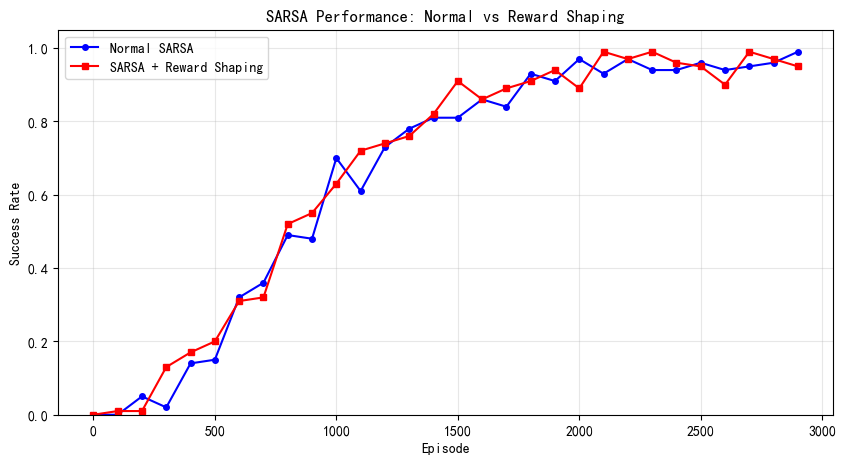

In [5]:

# 创建环境
env = gym.make('Taxi-v3', render_mode=None)

# 初始化Q表
Q = np.zeros([env.observation_space.n, env.action_space.n])

# 参数设置
alpha = 0.1
gamma = 0.99
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995
episodes = 3000

# Reward shaping函数
def shape_reward(state, action, reward, next_state, env):
    shaped_reward = reward
    
    # 解码状态
    curr_taxi_row, curr_taxi_col, pass_loc, dest = list(env.unwrapped.decode(state))
    next_taxi_row, next_taxi_col, next_pass_loc, next_dest = list(env.unwrapped.decode(next_state))
    
    # 乘客和目的地位置
    locations = [(0,0), (0,4), (4,0), (4,3)]
    
    # 如果乘客未上车，奖励靠近乘客的动作
    if pass_loc < 4:
        pass_row, pass_col = locations[pass_loc]
        curr_dist = abs(curr_taxi_row - pass_row) + abs(curr_taxi_col - pass_col)
        next_dist = abs(next_taxi_row - pass_row) + abs(next_taxi_col - pass_col)
        
        if next_dist < curr_dist:
            shaped_reward += 0.3
        elif next_dist > curr_dist:
            shaped_reward -= 0.2
    
    # 如果乘客已上车，奖励靠近目的地的动作
    elif pass_loc == 4:
        dest_row, dest_col = locations[dest]
        curr_dist = abs(curr_taxi_row - dest_row) + abs(curr_taxi_col - dest_col)
        next_dist = abs(next_taxi_row - dest_row) + abs(next_taxi_col - dest_col)
        
        if next_dist < curr_dist:
            shaped_reward += 0.5
        elif next_dist > curr_dist:
            shaped_reward -= 0.3
    
    # 惩罚错误的接客/送客动作
    if action == 4 and reward == -10:
        shaped_reward -= 1
    elif action == 5 and reward == -10:
        shaped_reward -= 1
    
    return shaped_reward

# 训练两个版本进行对比
def train_sarsa(use_reward_shaping=False):
    Q_local = np.zeros([env.observation_space.n, env.action_space.n])
    epsilon = epsilon_start
    episode_rewards = []
    
    for episode in range(episodes):
        state = env.reset()[0]
        
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_local[state])
        
        total_reward = 0
        done = False
        
        while not done:
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            
            # 应用reward shaping
            if use_reward_shaping:
                shaped_reward = shape_reward(state, action, reward, next_state, env)
            else:
                shaped_reward = reward
            
            if np.random.random() < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(Q_local[next_state])
            
            if done:
                Q_local[state, action] = Q_local[state, action] + alpha * (shaped_reward - Q_local[state, action])
            else:
                Q_local[state, action] = Q_local[state, action] + alpha * (
                    shaped_reward + gamma * Q_local[next_state, next_action] - Q_local[state, action]
                )
            
            state = next_state
            action = next_action
            total_reward += reward
        
        episode_rewards.append(total_reward)
        epsilon = max(epsilon_end, epsilon * epsilon_decay)
    
    return Q_local, episode_rewards

# 训练两个版本
print("Training SARSA without reward shaping...")
Q_normal, rewards_normal = train_sarsa(use_reward_shaping=False)

print("Training SARSA with reward shaping...")
Q_shaped, rewards_shaped = train_sarsa(use_reward_shaping=True)

# 测试两个版本
def test_policy(Q_table):
    test_episodes = 100
    successes = 0
    
    for _ in range(test_episodes):
        state = env.reset()[0]
        done = False
        total_reward = 0
        
        while not done:
            action = np.argmax(Q_table[state])
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            state = next_state
            total_reward += reward
        
        if total_reward > 0:
            successes += 1
    
    return successes / test_episodes

success_rate_normal = test_policy(Q_normal)
success_rate_shaped = test_policy(Q_shaped)

print(f"Normal SARSA success rate: {success_rate_normal:.2%}")
print(f"SARSA with reward shaping success rate: {success_rate_shaped:.2%}")

# 计算成功率曲线
def calculate_success_rates(rewards, window=100):
    success_rates = []
    for i in range(0, len(rewards), window):
        batch = rewards[i:i+window]
        success_rate = sum(1 for r in batch if r > 0) / len(batch)
        success_rates.append(success_rate)
    return success_rates

success_rates_normal = calculate_success_rates(rewards_normal)
success_rates_shaped = calculate_success_rates(rewards_shaped)

# 绘制对比图
plt.figure(figsize=(10, 5))

episodes_points = range(0, episodes, 100)
plt.plot(episodes_points, success_rates_normal, 'b-', label='Normal SARSA', marker='o', markersize=4)
plt.plot(episodes_points, success_rates_shaped, 'r-', label='SARSA + Reward Shaping', marker='s', markersize=4)

plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.title('SARSA Performance: Normal vs Reward Shaping')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([0, 1.05])
plt.show()



暂时看不出明显效果，可能是因为参数设置不佳，也可能因为Taxi本身就是比较简单的情景，所以随着探索衰减的epicilon-greedy已经够用